In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Loading images data

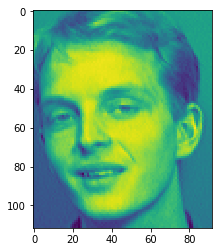

In [8]:
import glob
images = []
total_data =[]
for i in range(1,41):
    for img in glob.glob("s"+str(i)+"/*.pgm"):
        im =cv2.imread(img, 1).astype(np.uint8)
        im = im/255
        im = im[:,:, 0]
        plt.imshow(im)
        total_data.append(list((im, i)))
    
    

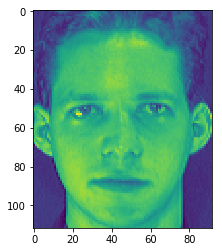

In [9]:
import pandas as pd
data = pd.DataFrame(total_data,columns=['Image','Label'])
plt.imshow(data['Image'][0])
plt.show()

In [10]:
data['Label'][0]

1

## Reshape the matrix of pixel intensities for an image into a vector

In [11]:
total_count=len(data['Image'])
for i in range(total_count):
    data['Image'][i] = data['Image'][i].flatten()


C:\Users\Achyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data['Image'][0].shape

(10304,)

In [13]:
training_images=[]
training_label = []
test_images = []
test_label = []
random_data = []
for i in range(1,41):
    if (5*i)<400:
        random_data.append(5*i)
for i in range(0,400):
    if(i>0  and (i+1 in  random_data)):
        test_images.append((data['Image'][i]).tolist())
        test_label.append(data['Label'][i])
    else:
        training_images.append((data['Image'][i]).tolist())
        training_label.append(data['Label'][i])

In [14]:
len(test_images)

40

In [15]:
for i in range(360):
    for j in range(10304):
        training_images[i][j]=np.asscalar(np.asarray(training_images[i][j]))
for i in range(40):
    for j in range(10304):
        test_images[i][j]=np.asscalar(np.asarray(test_images[i][j]))

## Creating matrix to trained and testing vectors

In [16]:
training_matrix_images = np.asmatrix(training_images ,dtype='float64')
test_matrix_images = np.asmatrix(test_images ,dtype='float64')

In [17]:
training_matrix_images.shape

(360, 10304)

In [18]:
test_matrix_images.shape

(40, 10304)

## PCA implementation with fitting 90% variance

In [19]:
from sklearn import decomposition
pca = decomposition.PCA(.90)
pca.fit(training_matrix_images)
pca.n_components_

105

In [20]:
training_matrix_images.shape

(360, 10304)

In [21]:
len(test_label)

40

In [22]:
train_img = pca.transform(training_matrix_images)
test_img = pca.transform(test_matrix_images)

In [23]:
test_img.shape

(40, 105)

## Logistic regression 

In [24]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs',multi_class='multinomial', penalty = 'l2')
logisticRegr.fit(train_img, training_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

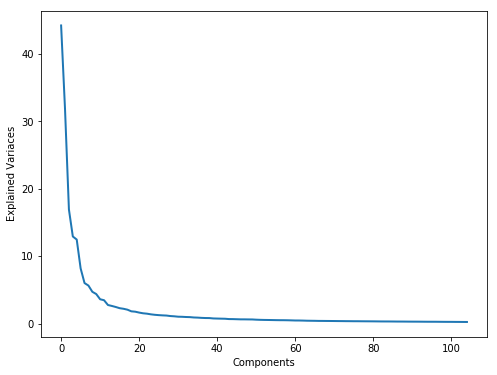

In [25]:
plt.figure(1, figsize=(8,6))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [26]:
logisticRegr.predict(test_img)

array([ 1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
        9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17,
       18, 18, 19, 11, 20, 20], dtype=int64)

In [27]:
logisticRegr.score(test_img, test_label)

0.975

## Confusion matrix

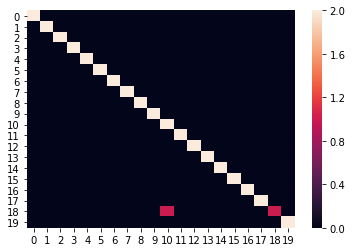

In [28]:
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.heatmap(metrics.confusion_matrix(test_label,logisticRegr.predict(test_img)))

## Classification report

In [29]:
file_names =[]
for i in range(1,41):
    file_names.append("s"+str(i))


In [30]:
print(metrics.classification_report(test_label,logisticRegr.predict(test_img[:]),target_names = file_names ))

             precision    recall  f1-score   support

         s1       1.00      1.00      1.00         2
         s2       1.00      1.00      1.00         2
         s3       1.00      1.00      1.00         2
         s4       1.00      1.00      1.00         2
         s5       1.00      1.00      1.00         2
         s6       1.00      1.00      1.00         2
         s7       1.00      1.00      1.00         2
         s8       1.00      1.00      1.00         2
         s9       1.00      1.00      1.00         2
        s10       1.00      1.00      1.00         2
        s11       0.67      1.00      0.80         2
        s12       1.00      1.00      1.00         2
        s13       1.00      1.00      1.00         2
        s14       1.00      1.00      1.00         2
        s15       1.00      1.00      1.00         2
        s16       1.00      1.00      1.00         2
        s17       1.00      1.00      1.00         2
        s18       1.00      1.00      1.00   

C:\Users\Achyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 20, does not match size of target_names, 40
  .format(len(labels), len(target_names))


## Average precision is 98%, recall and F1-score is 97%